In [1]:
from glob import glob
import pandas as pd

In [2]:
train_car = glob("train/*/*")
test_car = glob("test/*/*")

In [3]:
train_car

['train\\Acura Integra Type R 2001\\00198.jpg',
 'train\\Acura Integra Type R 2001\\00255.jpg',
 'train\\Acura Integra Type R 2001\\00308.jpg',
 'train\\Acura Integra Type R 2001\\00374.jpg',
 'train\\Acura Integra Type R 2001\\00878.jpg',
 'train\\Acura Integra Type R 2001\\00898.jpg',
 'train\\Acura Integra Type R 2001\\01010.jpg',
 'train\\Acura Integra Type R 2001\\01012.jpg',
 'train\\Acura Integra Type R 2001\\01255.jpg',
 'train\\Acura Integra Type R 2001\\01617.jpg',
 'train\\Acura Integra Type R 2001\\01864.jpg',
 'train\\Acura Integra Type R 2001\\01911.jpg',
 'train\\Acura Integra Type R 2001\\02095.jpg',
 'train\\Acura Integra Type R 2001\\02605.jpg',
 'train\\Acura Integra Type R 2001\\02738.jpg',
 'train\\Acura Integra Type R 2001\\02911.jpg',
 'train\\Acura Integra Type R 2001\\02919.jpg',
 'train\\Acura Integra Type R 2001\\03265.jpg',
 'train\\Acura Integra Type R 2001\\03608.jpg',
 'train\\Acura Integra Type R 2001\\03670.jpg',
 'train\\Acura Integra Type R 2001\\0371

In [4]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[5:][:-9]
  return car_class

def get_test_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[4::][:-9]
  return car_class

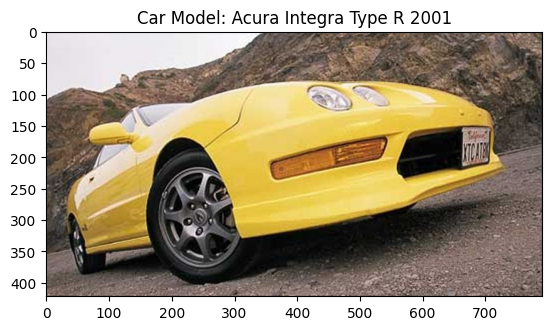

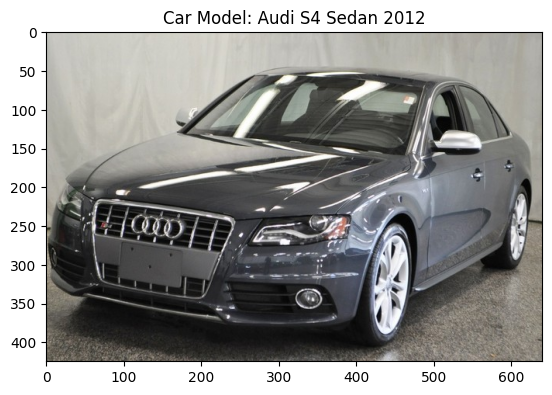

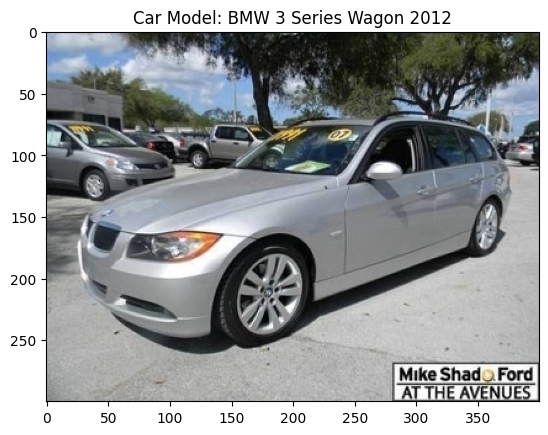

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
for i in range(1,2100,700):
    image = Image.open(train_car[i])
    label = get_car_class(train_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [6]:
y_train = []
y_test = []

for i in range(len(train_car)): 
  y_train.append(get_car_class(train_car[i]))

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)): 
    y_test.append(get_test_car_class(test_car[i]))

In [7]:
len(y_train)

8110

In [8]:
df_train_labels = pd.DataFrame(y_train, columns =['Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n = 1, expand = True)
df_train_labels["Make"]= make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_train_labels["Year"]= year_extraction[1]
df_train_labels

,Cars,Make,Year
0,Acura Integra Type R 2001,Acura,2001
1,Acura Integra Type R 2001,Acura,2001
2,Acura Integra Type R 2001,Acura,2001
3,Acura Integra Type R 2001,Acura,2001
4,Acura Integra Type R 2001,Acura,2001
...,...,...,...
8105,Volvo XC90 SUV 2007,Volvo,2007
8106,Volvo XC90 SUV 2007,Volvo,2007
8107,Volvo XC90 SUV 2007,Volvo,2007
8108,Volvo XC90 SUV 2007,Volvo,2007


In [9]:
df_test_labels = pd.DataFrame(y_test, columns =['Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n = 1, expand = True)
df_test_labels["Make"]= make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_test_labels["Year"]= year_extraction[1]
df_test_labels

,Cars,Make,Year
0,Acura Integra Type R 2001,Acura,2001
1,Acura Integra Type R 2001,Acura,2001
2,Acura Integra Type R 2001,Acura,2001
3,Acura Integra Type R 2001,Acura,2001
4,Acura Integra Type R 2001,Acura,2001
...,...,...,...
8035,Volvo XC90 SUV 2007,Volvo,2007
8036,Volvo XC90 SUV 2007,Volvo,2007
8037,Volvo XC90 SUV 2007,Volvo,2007
8038,Volvo XC90 SUV 2007,Volvo,2007


In [10]:
model_names = list(df_test_labels["Cars"].unique())

In [11]:
len(model_names)

196

In [13]:
df_train_labels.to_csv(f'training_labels.csv', index= False)
df_test_labels.to_csv(f'testing_labels.csv', index= False)

### DEEP LEARNING

In [14]:
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd


## deep learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import efficientnet

In [15]:
df_train_labels = pd.read_csv('training_labels.csv')
df_test_labels = pd.read_csv('testing_labels.csv')

train_car = glob("train/*/*")
test_car = glob("test/*/*")
model_names = list(df_test_labels["Cars"].unique())
len(model_names)

196

In [16]:
## setting up some parameters for data augmentation
img_width, img_height = 224, 224
train_samples = len(train_car)
validation_samples = len(test_car)
## there are 196 different models
n_classes = len(model_names)
batch_size = 32

In [17]:
from keras.preprocessing.image import ImageDataGenerator

## performing augmentation on the training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [19]:
## getting the path to the data
train_path = "train/"
test_path = "test/"

In [20]:
## converting data to a tf.data.Dataset object
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8110 images belonging to 196 classes.
Found 8040 images belonging to 196 classes.


In [22]:
## loading the EfficientNetB1 model
base_model = efficientnet.EfficientNetB1(weights='imagenet', include_top=False)

## adding some extra layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(196, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=predictions)

## fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False


# model_2.summary()

In [25]:
## compile model, define optimizer and the loss function
from tensorflow.keras import optimizers
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])

d:\Sem_3\PRG800\code\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
## train the model
history_2 = model_2.fit_generator(generator=train_generator,
                    steps_per_epoch=len(train_generator) ,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    epochs=20)

C:\Users\brije\AppData\Local\Temp\ipykernel_11828\375496647.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model_2.fit_generator(generator=train_generator,


Epoch 1/20
254/254 [==============================] - 1722s 7s/step - loss: 3.8371 - accuracy: 0.2047 - val_loss: 8.1773 - val_accuracy: 0.0056
Epoch 2/20
254/254 [==============================] - 1744s 7s/step - loss: 1.4574 - accuracy: 0.6143 - val_loss: 16.8748 - val_accuracy: 0.0066
Epoch 3/20
  6/254 [..............................] - ETA: 24:00 - loss: 0.7098 - accuracy: 0.8125

KeyboardInterrupt: 